# test the normalization routines for dNdz and winKappa

In [26]:
import crosspower as cp
#import FisherCl as fcl
import FisherCl2 as fcl
from numpy.linalg import eigh

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

In [27]:
# reload any changes that have been made to crosspower.py
reload(cp)
reload(fcl.cp)
#reload(fcl)

<module 'crosspower' from 'crosspower.pyc'>

In [28]:
# get matter power object
myPk = cp.matterPower()

zs.size:  998


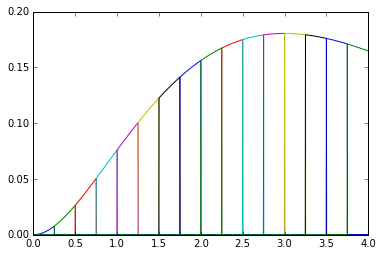

In [29]:
# look at dndz
# this plot uses getDNDZinterp
zmax = 4.0
nBins = 16
cp.plotModelDNDZbins(z0=1.5,zmax=zmax,nBins=nBins)

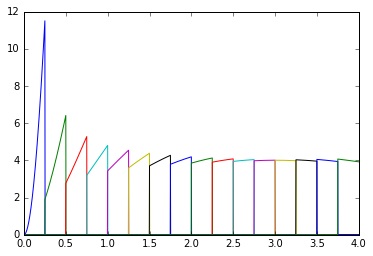

In [30]:
# this plot uses getNormalizedDNDZbin
cp.plotModelDNDZbins(z0=1.5,zmax=zmax,nBins=nBins,doNorm=True)

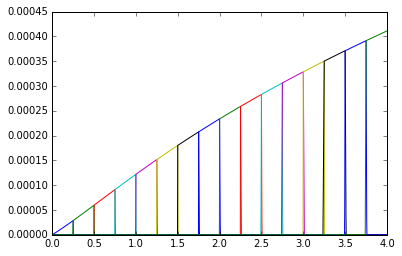

In [31]:
# look at lensing window function, normalized in bins
# this plot uses getWinKinterp
cp.plotWinKbins(myPk,zmax=zmax,nBins=nBins)

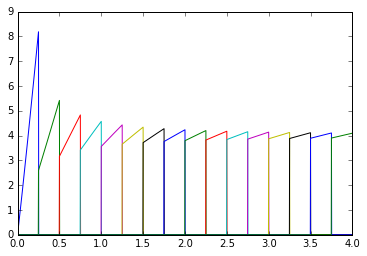

In [32]:
# this plot uses getNormalizedWinKbin
cp.plotWinKbins(myPk,zmax=zmax,nBins=nBins,doNorm=True)

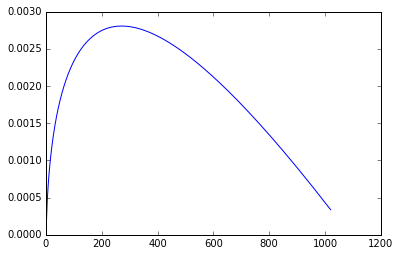

In [33]:
# look at non-normalized version
zs = myPk.zs
winKarray = cp.winKappa(myPk)
plt.plot(zs,winKarray);

(0, 0.0005)

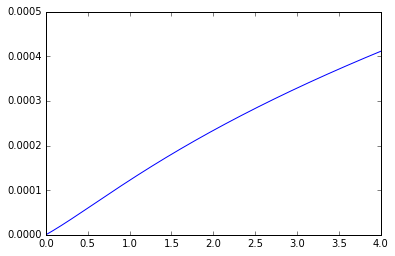

In [34]:
plt.plot(zs,winKarray)
plt.xlim([0,4])
plt.ylim([0,0.0005])

normFac:      0.0185194435554
direct calc:  0.0185185185185
0.333349983997


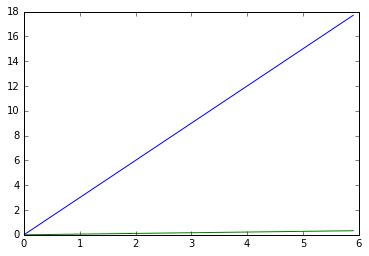

In [35]:
# Check normBin
# use a line through origin; area under it will be of a triangle
myFofZ = lambda z: 3*z
zDomain = np.arange(0,6,1./10)
# get normFac
normFac = cp.normBin(myFofZ,0,6,zDomain,1000)
myResult = myFofZ(zDomain)

# check normFac value
print 'normFac:     ',normFac
print 'direct calc: ',1/(3*6*6*.5) # 1/triangle area
print myFofZ(6)*normFac

plt.plot(zDomain,myResult)
plt.plot(zDomain,myResult*normFac);

binEdges:  [ 0.  1.  2.  3.  4.  5.  6.]
bin edges:  0.0 1.0
normFac: 0.666733273387 

bin edges:  1.0 2.0
normFac: 0.222229622476 

bin edges:  2.0 3.0
normFac: 0.133335997389 

bin edges:  3.0 4.0
normFac: 0.0952394544425 

bin edges:  4.0 5.0
normFac: 0.0740748963062 

bin edges:  5.0 6.0
normFac: 0.06061321672 



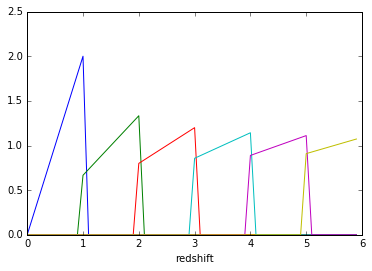

In [36]:
# check using more than 1 bin
reload(cp)
nBins = 6
zmax = 6
normPoints = 1000
verbose = False
binEdges = np.linspace(0,zmax,nBins+1) # +1 for fenceposts 
print 'binEdges: ',binEdges
for binNum in range(nBins):
    print 'bin edges: ',binEdges[binNum],binEdges[binNum+1]
    normFac = cp.normBin(myFofZ,binEdges[binNum],binEdges[binNum+1],zDomain,normPoints, verbose=verbose)
    print 'normFac:',normFac, '\n'
    FRange = myFofZ(zDomain)
    FRange[np.where(zDomain < binEdges[binNum])]   = 0
    FRange[np.where(zDomain > binEdges[binNum+1])] = 0
    plt.plot(zDomain,FRange*normFac)
plt.xlabel('redshift');

In [30]:
# looks like that did it!  Now on to seeing if that fixes things...

# Check the effect of raising the $\ell_{min}$ value for $F_{ij} = \Sigma_\ell (...)$

In [38]:
# Create a Fisher Matrix object
reload(fcl.cp)
reload(fcl)
zmax = 4
nBins = 4
Fobj = fcl.FisherMatrix(zmax=zmax,nBins=nBins,noAs=True)
print 'binAs: ',Fobj.binAs
print 'binBs: ',Fobj.binBs

creating matter power spectrum object...
zs.size:  998
creating more matter power objects...
creating matter power spectra for  ombh2  derivative...
zs.size:  998
zs.size:  998
creating matter power spectra for  omch2  derivative...
zs.size:  998
zs.size:  998
creating matter power spectra for  cosmomc_theta  derivative...
zs.size:  998
zs.size:  998
creating matter power spectra for  As  derivative...
zs.size:  998
zs.size:  998
creating matter power spectra for  ns  derivative...
zs.size:  998
zs.size:  998
creating matter power spectra for  tau  derivative...
zs.size:  998
zs.size:  998
creating matter power spectra for  mnu  derivative...
zs.size:  998
zs.size:  998
fiducial bs:  [ 1.6101423   2.30928962  3.11272888  3.93740365]
fiducial As:  [ 1.00101594  1.00099119  1.00099579  1.0009976 ]
starting cross power with entire kappa... 
starting angular cross power spectrum  0 ,  0 ... 
window  1 : kappa  0
window  2 : kappa  0


crosspower.py:1146: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if zs == None:
crosspower.py:1037: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if zs == None:


window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
starting angular cross power spectrum  0 ,  1 ... 
window  1 : kappa  0
window  2 : galaxies  1
window  1 : kappa  0
window  2 : galaxies  1
window  1 : kappa  0
window  2 : galaxies  1
window  1 : kappa  0
window  2 : galaxies  1
window  1 : kappa  0
window  2 : galaxies  1
window  1 : kappa  0
window  2 : galaxies  1
window  1 : kappa  0
window  2 : galaxies  1
window  1 : kappa  0
window  2 : galaxies  1
w

In [44]:
"""# save it
import pickle
filehandler = open('Fisher_4_4.obj','w')
#filehandler2 = open('Fisher_4_4_myPk.obj','w')
# ditch the myPk part since pickle can't handle classes within a class
myPkTemp = Fobj.myPk
Fobj.myPk = 0
pickle.dump(Fobj,filehandler)
#pickle.dump(myPkTemp,filehandler2)
# put it back
Fobj.myPk = myPkTemp
print 'done'
"""

done


In [ ]:
"""# code to re-open it
import FisherCl2 as fcl
import pickle
filehandler2 = open('Fisher_4_4.obj', 'r') 
Fobj2 = pickle.load(filehandler2) 
"""

In [45]:
print Fobj.obsList
print Fobj.paramList

[  0.   1.   2.   3.   4.   6.   7.   8.   9.  12.  13.  14.  18.  19.  24.]
['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'bin1', 'bin2', 'bin3', 'bin4']


In [47]:
sigmas = Fobj.getSigmas()
for i,p in enumerate(Fobj.paramList):
    print p, sigmas[i]

ombh2 0.000435678357341
omch2 0.000877480388038
cosmomc_theta 1.43486314558e-05
As 2.01054152559e-11
ns 0.00210553290267
tau 0.908807498408
mnu 0.0155809091731
bin1 0.00344850771486
bin2 0.00301425608978
bin3 0.00340040824267
bin4 0.00421765864057


In [50]:
# make comparison against version with higher lmin
# copy some code from FisherMatrix.__init__

def makeFisher(Fobj,lmin):
    """ code copied from FisherMatrix.__init__
        Inputs:
            Fobj:
            lmin: minimum ell to make Fij
    """
    #Build Fisher matrix
    #multply vectorT,invcov,vector and add up
    print 'building Fisher matrix from components...'
    print 'invCov.shape: ',Fobj.invCov.shape,', dClVecs.shape: ',Fobj.dClVecs.shape
    nParams = Fobj.nParams
    lmax = 2000 #Fobj.lmax
    Fij = np.zeros((nParams,nParams)) # indices match those in paramList
    for i in range(nParams):
      print 'starting bin set ',i+1,' of ',nParams
      dClVec_i = Fobj.dClVecs[:,i,:] # shape (nCls,nElls)
      for j in range(nParams):
        dClVec_j = Fobj.dClVecs[:,j,:] # shape (nCls,nElls)
        # ugh.  don't like nested loops in Python... but easier to program...
        for ell in range(lmin-2,lmax-1): #-2 to match the indices
          myCov = Fobj.invCov[:,:,ell]
          fij = np.dot(dClVec_i[:,ell],np.dot(myCov,dClVec_j[:,ell]))
          
          Fij[i,j] += fij
    
    print 'creation of Fisher Matrix complete!\n'
    return Fij

In [51]:
# check to see if result is the same with lmin = 2
Fij = makeFisher(Fobj,lmin=2)

building Fisher matrix from components...
invCov.shape:  (15, 15, 1999) , dClVecs.shape:  (15, 11, 1999)
starting bin set  1  of  11
starting bin set  2  of  11
starting bin set  3  of  11
starting bin set  4  of  11
starting bin set  5  of  11
starting bin set  6  of  11
starting bin set  7  of  11
starting bin set  8  of  11
starting bin set  9  of  11
starting bin set  10  of  11
starting bin set  11  of  11
creation of Fisher Matrix complete!



In [52]:
sigmas2 = np.sqrt(np.diag(np.linalg.inv(Fij)))
print 'comparing two sets of sigmas:'
for i,p in enumerate(Fobj.paramList):
    print p, sigmas[i], sigmas2[i]

comparting two sets of sigmas:
ombh2 0.000435678357341 0.000435678357341
omch2 0.000877480388038 0.000877480388038
cosmomc_theta 1.43486314558e-05 1.43486314558e-05
As 2.01054152559e-11 2.01054152559e-11
ns 0.00210553290267 0.00210553290267
tau 0.908807498408 0.908807498408
mnu 0.0155809091731 0.0155809091731
bin1 0.00344850771486 0.00344850771486
bin2 0.00301425608978 0.00301425608978
bin3 0.00340040824267 0.00340040824267
bin4 0.00421765864057 0.00421765864057


In [53]:
# check to see if result is the same with lmin = 10,20
Fij10 = makeFisher(Fobj,lmin=10)
Fij20 = makeFisher(Fobj,lmin=20)
sigmas10 = np.sqrt(np.diag(np.linalg.inv(Fij10)))
sigmas20 = np.sqrt(np.diag(np.linalg.inv(Fij20)))
print 'comparting four sets of sigmas for lmin = 2,2,10,20:'
for i,p in enumerate(Fobj.paramList):
    print p, sigmas[i], sigmas2[i], sigmas10[i], sigmas20[i]

building Fisher matrix from components...
invCov.shape:  (15, 15, 1999) , dClVecs.shape:  (15, 11, 1999)
starting bin set  1  of  11
starting bin set  2  of  11
starting bin set  3  of  11
starting bin set  4  of  11
starting bin set  5  of  11
starting bin set  6  of  11
starting bin set  7  of  11
starting bin set  8  of  11
starting bin set  9  of  11
starting bin set  10  of  11
starting bin set  11  of  11
creation of Fisher Matrix complete!

building Fisher matrix from components...
invCov.shape:  (15, 15, 1999) , dClVecs.shape:  (15, 11, 1999)
starting bin set  1  of  11
starting bin set  2  of  11
starting bin set  3  of  11
starting bin set  4  of  11
starting bin set  5  of  11
starting bin set  6  of  11
starting bin set  7  of  11
starting bin set  8  of  11
starting bin set  9  of  11
starting bin set  10  of  11
starting bin set  11  of  11
creation of Fisher Matrix complete!

comparting four sets of sigmas for lmin = 2,2,10,20:
ombh2 0.000435678357341 0.000435678357341 0

In [54]:
# check to see if result is the same with lmin = 50,100
Fij50 = makeFisher(Fobj,lmin=50)
Fij100 = makeFisher(Fobj,lmin=100)
sigmas50 = np.sqrt(np.diag(np.linalg.inv(Fij50)))
sigmas100 = np.sqrt(np.diag(np.linalg.inv(Fij100)))
print 'comparting four sets of sigmas for lmin = 2,10,50,100:'
for i,p in enumerate(Fobj.paramList):
    print p, sigmas[i], sigmas10[i], sigmas50[i], sigmas100[i]

building Fisher matrix from components...
invCov.shape:  (15, 15, 1999) , dClVecs.shape:  (15, 11, 1999)
starting bin set  1  of  11
starting bin set  2  of  11
starting bin set  3  of  11
starting bin set  4  of  11
starting bin set  5  of  11
starting bin set  6  of  11
starting bin set  7  of  11
starting bin set  8  of  11
starting bin set  9  of  11
starting bin set  10  of  11
starting bin set  11  of  11
creation of Fisher Matrix complete!

building Fisher matrix from components...
invCov.shape:  (15, 15, 1999) , dClVecs.shape:  (15, 11, 1999)
starting bin set  1  of  11
starting bin set  2  of  11
starting bin set  3  of  11
starting bin set  4  of  11
starting bin set  5  of  11
starting bin set  6  of  11
starting bin set  7  of  11
starting bin set  8  of  11
starting bin set  9  of  11
starting bin set  10  of  11
starting bin set  11  of  11
creation of Fisher Matrix complete!

comparting four sets of sigmas for lmin = 2,10,50,100:
ombh2 0.000435678357341 0.000435827479781

In [55]:
# check to see if result is the same with lmin = 200,500
Fij200 = makeFisher(Fobj,lmin=200)
Fij500 = makeFisher(Fobj,lmin=500)
sigmas200 = np.sqrt(np.diag(np.linalg.inv(Fij200)))
sigmas500 = np.sqrt(np.diag(np.linalg.inv(Fij500)))
print 'comparing four sets of sigmas for lmin = 2,10,20,100,200,500:'
for i,p in enumerate(Fobj.paramList):
    print p, sigmas[i], sigmas10[i], sigmas20[i], sigmas100[i], sigmas200[i], sigmas500[i]

building Fisher matrix from components...
invCov.shape:  (15, 15, 1999) , dClVecs.shape:  (15, 11, 1999)
starting bin set  1  of  11
starting bin set  2  of  11
starting bin set  3  of  11
starting bin set  4  of  11
starting bin set  5  of  11
starting bin set  6  of  11
starting bin set  7  of  11
starting bin set  8  of  11
starting bin set  9  of  11
starting bin set  10  of  11
starting bin set  11  of  11
creation of Fisher Matrix complete!

building Fisher matrix from components...
invCov.shape:  (15, 15, 1999) , dClVecs.shape:  (15, 11, 1999)
starting bin set  1  of  11
starting bin set  2  of  11
starting bin set  3  of  11
starting bin set  4  of  11
starting bin set  5  of  11
starting bin set  6  of  11
starting bin set  7  of  11
starting bin set  8  of  11
starting bin set  9  of  11
starting bin set  10  of  11
starting bin set  11  of  11
creation of Fisher Matrix complete!

comparting four sets of sigmas for lmin = 2,10,20,100,200,500:
ombh2 0.000435678357341 0.0004358

In [57]:
print 'comparing four sets of sigmas for lmin = 2,10,100,500:'
for i,p in enumerate(Fobj.paramList):
    print p, sigmas[i], sigmas10[i], sigmas100[i], sigmas500[i]

comparing four sets of sigmas for lmin = 2,10,100,500:
ombh2 0.000435678357341 0.000435827479781 0.000449732026652 0.000579988871579
omch2 0.000877480388038 0.000877634014838 0.000896700010252 0.00115530506922
cosmomc_theta 1.43486314558e-05 1.43569616936e-05 1.48292188185e-05 1.79089033857e-05
As 2.01054152559e-11 2.01165811535e-11 2.11880338641e-11 3.10727263129e-11
ns 0.00210553290267 0.00210673268598 0.0021511713968 0.00251663654669
tau 0.908807498408 0.908938661191 0.912529030187 0.934428499281
mnu 0.0155809091731 0.015602215374 0.0172381790818 0.023332770327
bin1 0.00344850771486 0.00345007491638 0.00352958706785 0.00394600956792
bin2 0.00301425608978 0.00301587887979 0.0030846470244 0.00338381385319
bin3 0.00340040824267 0.00340204359441 0.00349161813272 0.00389929349184
bin4 0.00421765864057 0.00421981211164 0.004384817467 0.00511915966999


In [56]:
print 'comparing ratios sets of sigmas for lmin = 10/2, 100/2, 500/2:'
for i,p in enumerate(Fobj.paramList):
    print p, sigmas10[i]/sigmas[i], sigmas100[i]/sigmas[i], sigmas500[i]/sigmas[i]

comparing ratios sets of sigmas for lmin = 10/2, 100/2, 500/2:
ombh2 1.00034227645 1.03225698287 1.3312317718
omch2 1.00017507719 1.02190319291 1.31661639961
cosmomc_theta 1.00058055974 1.0334936028 1.24812623705
As 1.00055536767 1.05384711504 1.54549040233
ns 1.00056982406 1.02167550746 1.19524921387
tau 1.00014432406 1.00409496157 1.02819188983
mnu 1.00136745556 1.10636541747 1.49752303077
bin1 1.00045445788 1.02351143152 1.14426583734
bin2 1.00053837165 1.02335267228 1.12260330656
bin3 1.00048092806 1.02682321755 1.14671333957
bin4 1.00051058449 1.03963308572 1.213744427


# Get ready some comparisons with Byeonghee's code.
First throw out the $\tau$ row and column from each Matrix, since he is not using $\tau$

In [59]:
paramList = Fobj.paramList
print paramList
# use various lmin values: 
# Fij (lmin 2)
# Fij10
# Fij50
# Fij100

['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'bin1', 'bin2', 'bin3', 'bin4']


In [66]:
# verify how the delete function works
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
toDelete = 1
print arr
arr2 = np.delete(arr,toDelete,0)
print arr2
arr3 = np.delete(arr2,toDelete,1)
print arr3

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  2  3  4]
 [ 9 10 11 12]]
[[ 1  3  4]
 [ 9 11 12]]


In [67]:
# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)

In [70]:
# remove tau: row,column = 5
toDelete = 5
paramListB = np.delete(paramList,toDelete)
Fij2b = fixParam(Fij,toDelete)
Fij10b = fixParam(Fij10,toDelete)
Fij50b = fixParam(Fij50,toDelete)
Fij100b = fixParam(Fij100,toDelete)
print paramList
print paramListB
print Fij2b.shape

['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'bin1', 'bin2', 'bin3', 'bin4']
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'mnu' 'bin1' 'bin2' 'bin3'
 'bin4']
(10, 10)


In [81]:
def getSigmas(Fij,paramList,lmin):
    """ report Fij and return sigmas """
    np.set_printoptions(precision=3)
    sigmas = np.sqrt(np.diag(np.linalg.inv(Fij)))
    print 'Fij with lmin = ',lmin,': '
    print Fij
    print 'one sigma error forecasts:'
    for i,p in enumerate(paramList):
        print p, sigmas[i]
    print '\n'
    return sigmas

In [82]:
sigmas2b = getSigmas(Fij2b,paramListB,2)
sigmas10b = getSigmas(Fij10b,paramListB,10)
sigmas50b = getSigmas(Fij50b,paramListB,50)
sigmas100b = getSigmas(Fij100b,paramListB,100)

Fij with lmin =  2 : 
[[  4.228e+09  -4.966e+09   6.303e+10  -1.118e+17  -2.144e+08   9.993e+07
   -7.259e+07  -3.836e+07  -2.358e+07  -1.651e+07]
 [ -4.966e+09   5.880e+09  -7.257e+10   1.336e+17   2.511e+08  -1.198e+08
    8.091e+07   4.498e+07   2.873e+07   2.085e+07]
 [  6.303e+10  -7.257e+10   1.076e+12  -1.573e+18  -3.051e+09   1.374e+09
   -1.469e+09  -5.589e+08  -2.840e+08  -1.643e+08]
 [ -1.118e+17   1.336e+17  -1.573e+18   3.083e+24   5.649e+15  -2.778e+15
    1.684e+15   1.009e+15   6.678e+14   5.025e+14]
 [ -2.144e+08   2.511e+08  -3.051e+09   5.649e+15   1.172e+07  -5.131e+06
    3.390e+06   1.690e+06   1.176e+06   9.393e+05]
 [  9.993e+07  -1.198e+08   1.374e+09  -2.778e+15  -5.131e+06   2.530e+06
   -1.480e+06  -8.702e+05  -5.782e+05  -4.269e+05]
 [ -7.259e+07   8.091e+07  -1.469e+09   1.684e+15   3.390e+06  -1.480e+06
    3.119e+06  -8.700e-15   1.152e-14   1.085e-15]
 [ -3.836e+07   4.498e+07  -5.589e+08   1.009e+15   1.690e+06  -8.702e+05
    1.161e-14   1.526e+06  -5